# The Marine Debris Archive (MARIDA) is a Sentinel-2 satellite image archive focused on marine debris. It was initially 
# published by group researcher in Jan 2022.  They introduce a Marine Debris Archive (MARIDA) dataset for developing and 
# evaluating ML algorithms capable of detecting Marine Debris. As for this project we will use the same dataset to Perform # data processing, visualiation, apply some models and compare there results.

In [2]:
#Loading all the necessary Libraries

import rasterio  
import re 
import os 
import glob 
import json 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
# Path of the primary folder that contain the TIFF image subfolders.
main_folder_path = r'C:\DIL_Project_DS\data\patches'
labels_file_path = r'C:\DIL_Project_DS\data\labels_mapping.txt' # Labels mapping 
train_X_file = r"C:\DIL_Project_DS\data\splits\train_X.txt"
test_X_file = r"C:\DIL_Project_DS\data\splits\test_X.txt"
val_X_file = r"C:\DIL_Project_DS\data\splits\val_X.txt"

In [4]:
# Main Dictionary to hold images
images = {}

# Simple function to extract numbers from a string
def extract_numbers(s):
    return int(''.join(re.findall(r'\d+', s)))

# This line of code utilizes the glob module to recursively search for all files with a .tif extension 
# within the directory specified by main_folder_path, storing the resulting file paths in the list tif_files.
tif_files = glob.glob(os.path.join(main_folder_path, '**/*.tif'), recursive=True)

# Sorting the list into ascending order
tif_files.sort(key=extract_numbers)

# load each image separately into directory, The loop iterates over every third element in the tif_files list
# After the loop images dictionary will have keys=filename and values= loaded images
for i in range(0, len(tif_files), 3): 
    tif_file = tif_files[i]
    with rasterio.open(tif_file) as src:
        # fetch the base name of the file without the extension
        base_name = (os.path.basename(tif_file))
        images[base_name] = src.read()


In [5]:
# Count the number of images loaded
num_images = len(images)
#print(f"Number of loaded images: {num_images}")

# Print the file paths of the images
for image_path in images:
    print(image_path)

# Below is images loaded with out the labels

S2_3-1-21_18QYF_0.tif
S2_3-1-21_18QYF_1.tif
S2_3-1-21_18QYF_2.tif
S2_3-1-21_18QYF_3.tif
S2_3-1-21_18QYF_4.tif
S2_4-3-18_50LLR_0.tif
S2_4-3-18_50LLR_1.tif
S2_4-3-18_50LLR_2.tif
S2_4-3-18_50LLR_3.tif
S2_4-3-18_50LLR_4.tif
S2_4-3-18_50LLR_5.tif
S2_4-3-18_50LLR_6.tif
S2_4-3-18_50LLR_7.tif
S2_4-3-18_50LLR_8.tif
S2_4-3-18_50LLR_9.tif
S2_4-9-16_16PCC_0.tif
S2_4-9-16_16PCC_1.tif
S2_4-9-16_16PCC_2.tif
S2_4-9-16_16PCC_3.tif
S2_4-9-16_16PCC_4.tif
S2_4-9-16_16PCC_5.tif
S2_4-9-16_16PCC_6.tif
S2_4-9-16_16PCC_7.tif
S2_4-9-16_16PCC_8.tif
S2_4-9-16_16PCC_9.tif
S2_4-9-19_16PCC_0.tif
S2_4-9-19_16PCC_1.tif
S2_4-9-19_16PCC_2.tif
S2_4-9-19_16PCC_3.tif
S2_4-9-19_16PCC_4.tif
S2_4-9-19_16PCC_5.tif
S2_4-9-19_16PCC_6.tif
S2_4-9-19_16PCC_7.tif
S2_4-9-19_16PCC_8.tif
S2_4-9-19_16PCC_9.tif
S2_7-3-20_18QYG_0.tif
S2_7-3-20_18QYG_1.tif
S2_7-3-20_18QYG_2.tif
S2_7-3-20_18QYG_3.tif
S2_7-3-20_18QYG_4.tif
S2_7-3-20_18QYG_5.tif
S2_7-3-20_18QYG_6.tif
S2_7-3-20_18QYG_7.tif
S2_7-3-20_18QYG_8.tif
S2_7-3-20_18QYG_9.tif
S2_8-3-18_

In [6]:
# dictionary to hold labelled images
labeled_images = {}

# 'labels' is a dictionary where the keys = filenames and values = lists of labels
with open(labels_file_path, 'r') as f:
    labels = json.load(f)

# load each image with its label
for filename, image in images.items():
    # get the base name without the extension
    base_name = os.path.basename(filename)
    # get the label for each image
    label_list = labels.get(base_name)
    if label_list is None:
        print(f"No label found: {base_name}")
    # add image and its label to the 'labeled_images'
    labeled_images[filename] = {'image': image, 'label': label_list}

In [7]:
for filename, image_data in labeled_images.items():
    print(f"Image Filename: {filename}, Respective Label: {image_data['label']}")

# loading images with labels

Image Filename: S2_3-1-21_18QYF_0.tif, Respective Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Image Filename: S2_3-1-21_18QYF_1.tif, Respective Label: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Image Filename: S2_3-1-21_18QYF_2.tif, Respective Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Image Filename: S2_3-1-21_18QYF_3.tif, Respective Label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Image Filename: S2_3-1-21_18QYF_4.tif, Respective Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Image Filename: S2_4-3-18_50LLR_0.tif, Respective Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Image Filename: S2_4-3-18_50LLR_1.tif, Respective Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Image Filename: S2_4-3-18_50LLR_2.tif, Respective Label: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Image Filename: S2_4-3-18_50LLR_3.tif, Respective Label: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Image Filename: S2_4-3-18_50LLR_4.tif, Respective Label: [1, 0, 0, 0, 0, 

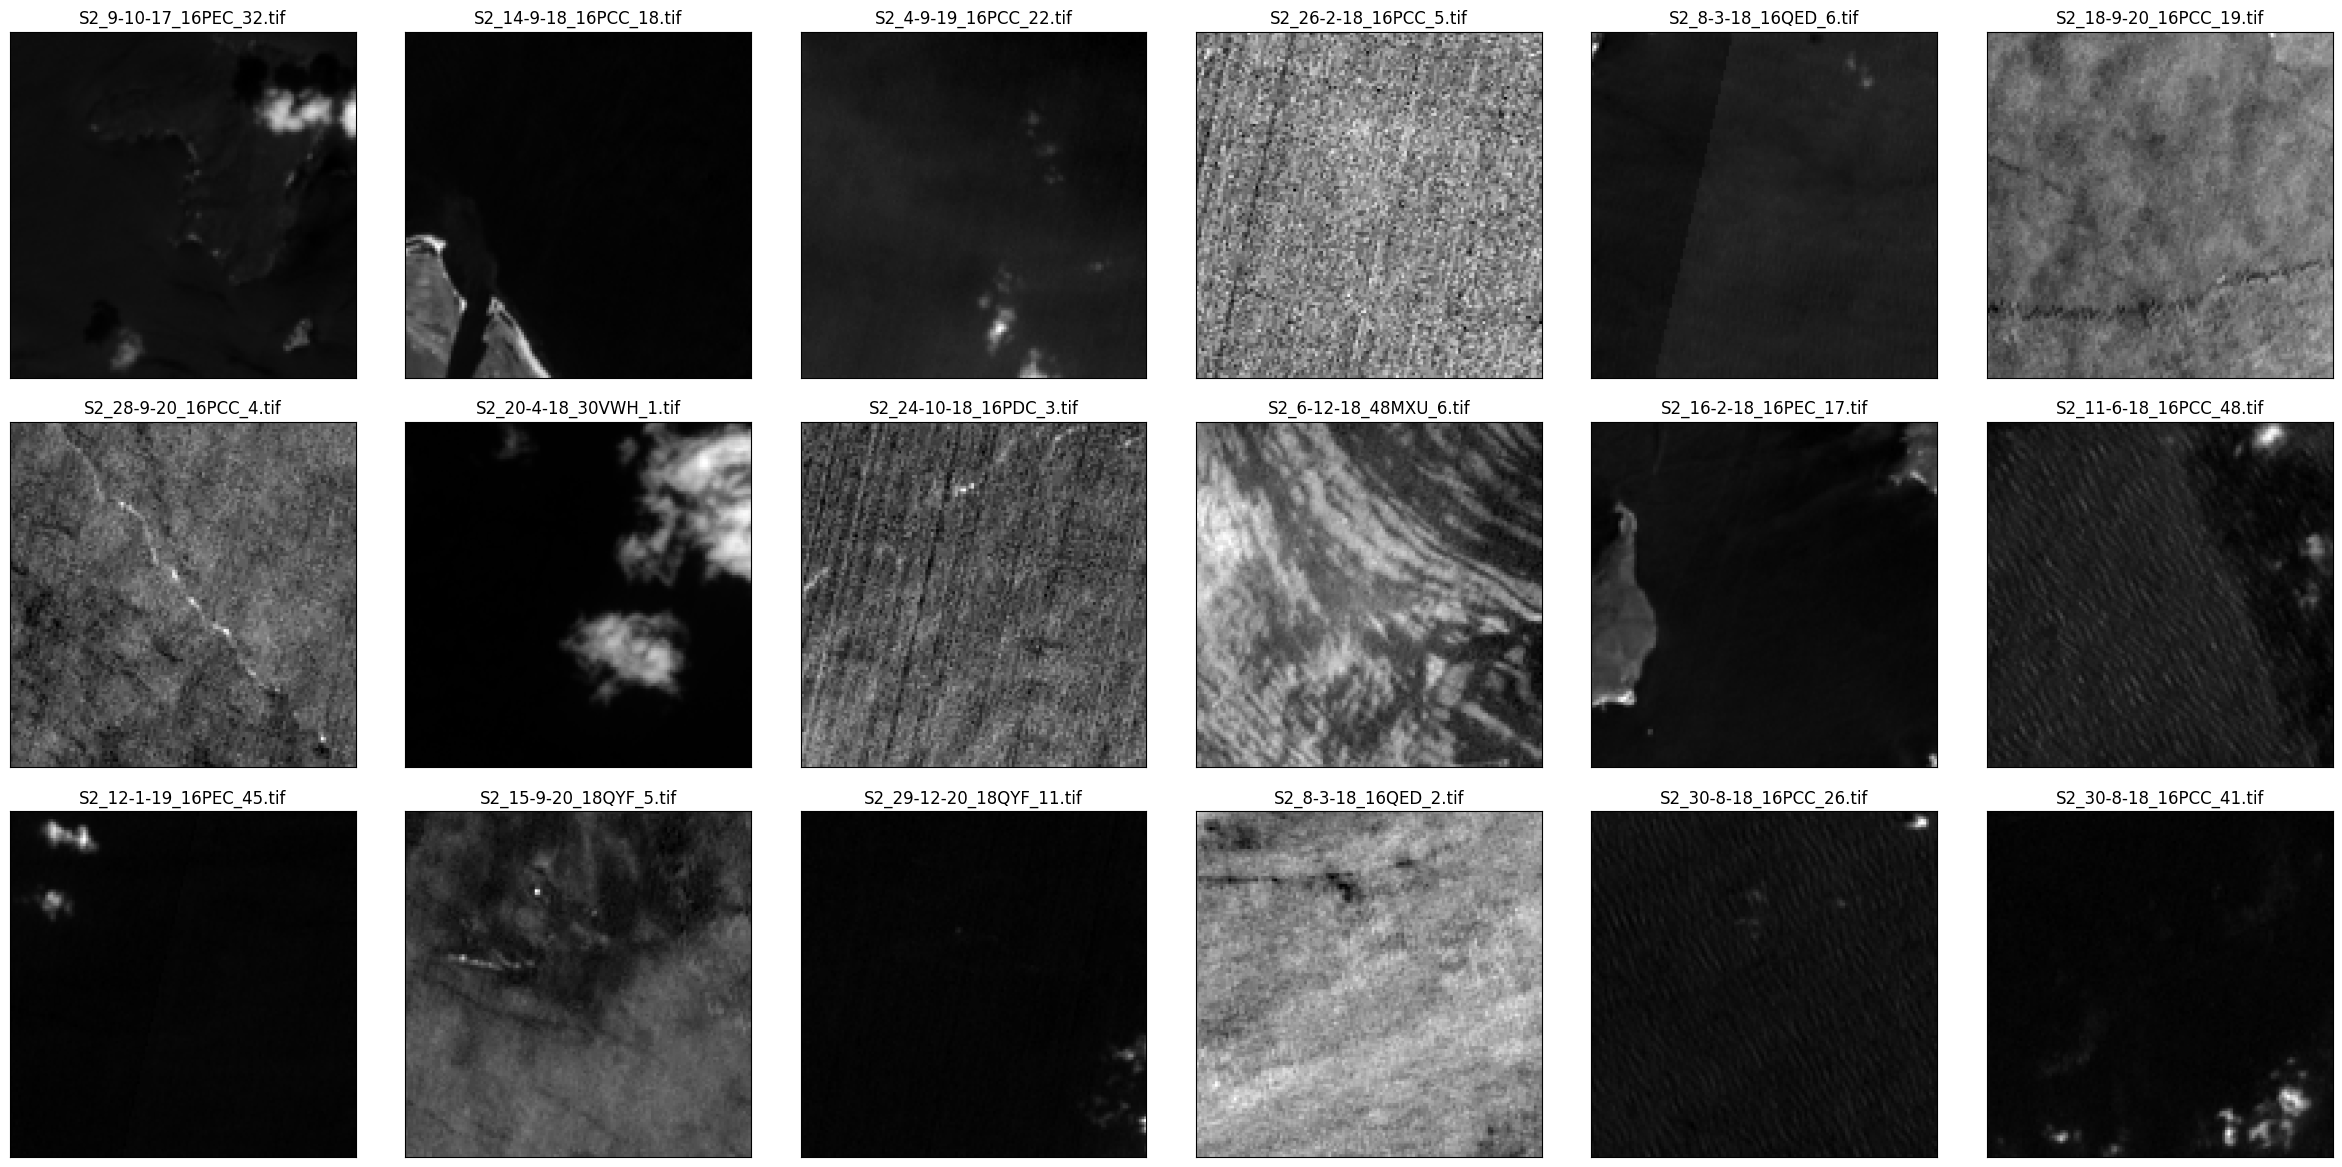

In [9]:
#Randomly ploting some Images
cols = 6
rows = 3

# Creating a new figure
fig = plt.figure(figsize=(cols * 4, rows * 4))

# Selecting random sample of 18 images
random_images = random.sample(list(images.items()), 18)

# Iterate through random images
for i, (image_key, image_data) in enumerate(random_images):
    # Convert the images to a numpy array
    image_array = np.array(image_data)

    # If the image has multiple bands, select the first one
    if image_array.ndim > 2:
        image_array = image_array[10, :, :]  # Using only first band since these are grayscale images

    # Extract the image name from the path
    image_name = os.path.basename(image_key)

    # Add a subplot for the current image
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(image_array, cmap='gray')
    ax.set_title(image_name, fontsize=12)  # Adjust title font size
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks
    ax.grid(False)  # Turn off grid lines

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()

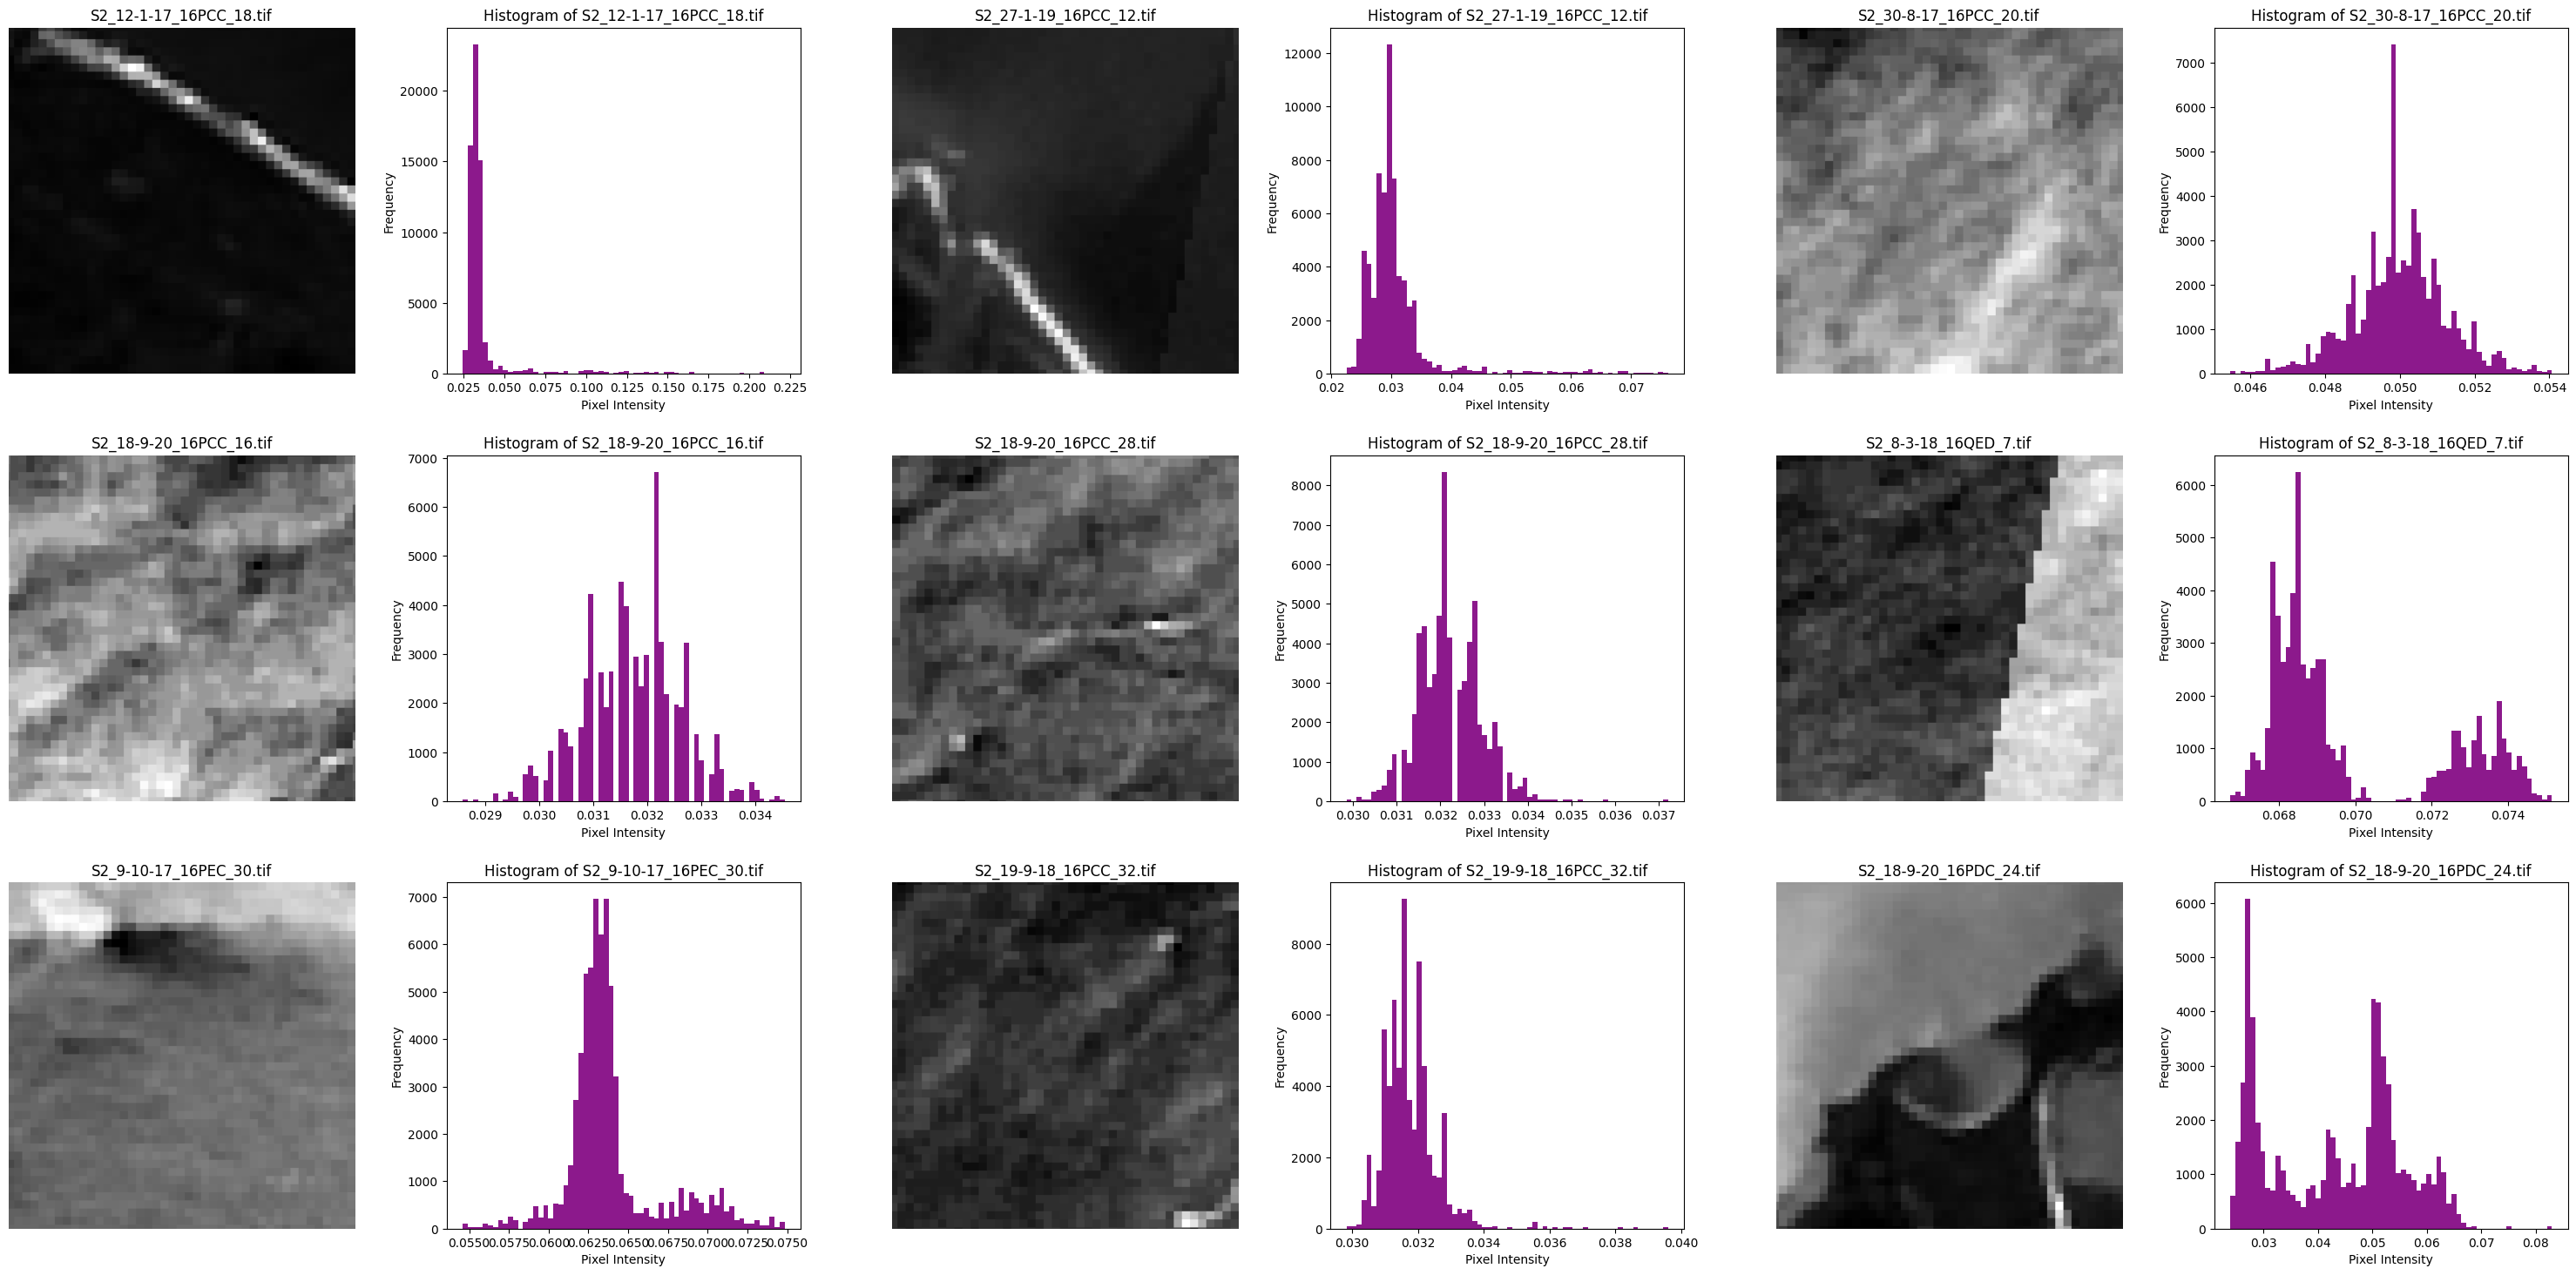

In [10]:
# Set the number of rows and columns for your subplot grid
cols = 3
rows = 3

# Create a new figure with larger size
fig, axs = plt.subplots(rows, cols*2, figsize=(cols * 10, rows * 5))

# Select a random sample of images
random_images = random.sample(list(images.items()), cols * rows)

# Iterate over the random images
for i, (image_key, image_data) in enumerate(random_images):
    # Convert the image data to a numpy array
    image_array = np.array(image_data)

    # If the image has multiple bands, select the first one
    if image_array.ndim > 2:
        image_array = image_array[0, :, :]  # Assuming you want to display the first band

    # Extract the image name from the path
    image_name = os.path.basename(image_key)

    # Calculate the row and column indices for the current subplot
    row_index = i // cols
    col_index = i % cols

    # Add a subplot for the current image and its histogram
    ax_img = axs[row_index, col_index * 2]
    ax_hist = axs[row_index, col_index * 2 + 1]

    ax_img.imshow(image_array, cmap='gray')
    ax_img.set_title(image_name)
    ax_img.axis('off')  # Turn off axis

    # Create a histogram for the current image
    ax_hist.hist(image_array.ravel(), bins=64, color='Purple', alpha=0.9)
    ax_hist.set_title('Histogram of {}'.format(image_name))
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()


In [12]:
# Create a dictionary to map class indices to names
class_names = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Sargassum',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Clouds',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves',
    13: 'Cloud Shadows',
    14: 'Wakes',
    15: 'Mixed Water'
}


In [13]:
# Create a dictionary to hold the counts for each class
class_counts = {class_name: 0 for class_name in class_names.values()}

# Iterate over all labeled images and count the classes
for filename, data in labeled_images.items():
    # Get the class indices for this image
    class_indices = data['label']
    # Map the class indices to names
    class_names_for_image = [class_names[i+1] for i, present in enumerate(class_indices) if present]
    # Increment the count for each class
    for class_name in class_names_for_image:
        class_counts[class_name] += 1

# Print out the counts for each class
for class_name, count in class_counts.items():
    print(f"{class_name}, Number of Images: {count}")


Marine Debris, Number of Images: 373
Dense Sargassum, Number of Images: 49
Sparse Sargassum, Number of Images: 106
Natural Organic Material, Number of Images: 71
Ship, Number of Images: 182
Clouds, Number of Images: 181
Marine Water, Number of Images: 870
Sediment-Laden Water, Number of Images: 51
Foam, Number of Images: 59
Turbid Water, Number of Images: 220
Shallow Water, Number of Images: 64
Waves, Number of Images: 54
Cloud Shadows, Number of Images: 71
Wakes, Number of Images: 106
Mixed Water, Number of Images: 140


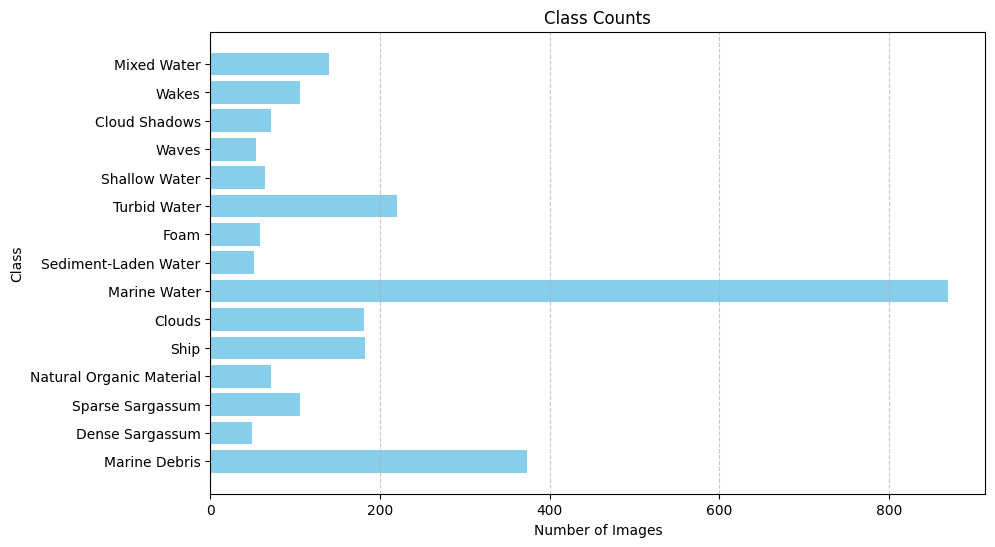

In [14]:
# Extract class names and counts
class_names = list(class_counts.keys())
class_counts_values = list(class_counts.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(class_names, class_counts_values, color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Class Counts')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\AB_\AppData\Local\Temp\ipykernel_15464\2151955366.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Class', y='Number of Images', palette='viridis')


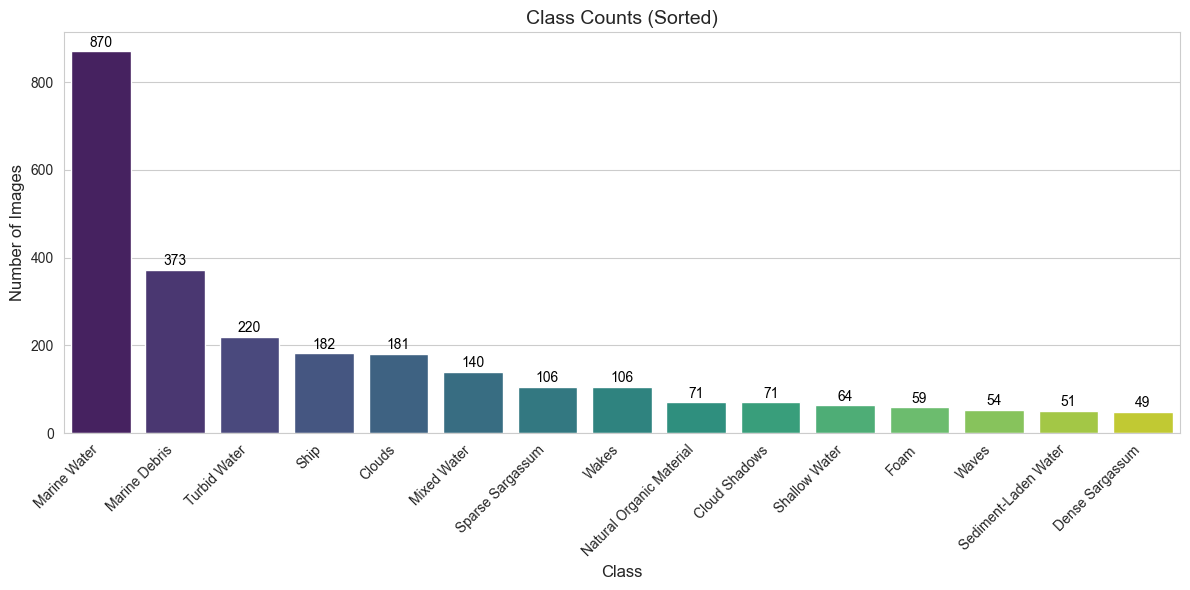

In [16]:

# Set the Seaborn style
sns.set_style("whitegrid")

# Sort class counts in descending order
sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
class_names_sorted = [x[0] for x in sorted_class_counts]
class_counts_sorted = [x[1] for x in sorted_class_counts]

# Create dataframe from sorted class counts
df_sorted = pd.DataFrame({'Class': class_names_sorted, 'Number of Images': class_counts_sorted})

# Create vertical bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='Class', y='Number of Images', palette='viridis')

# Add annotations (number of images) to each bar
for index, row in df_sorted.iterrows():
    plt.text(index, row['Number of Images'] + 10, f"{row['Number of Images']}", ha='center', color='black', fontsize=10)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Counts (Sorted)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


We Will Test some models now

In [17]:

# Read the file names from the text files
with open(train_X_file, 'r') as file:
    train_X = ["S2_" + line.strip() + ".tif" for line in file]

with open(test_X_file, 'r') as file:
    test_X = ["S2_" + line.strip() + ".tif" for line in file]

with open(val_X_file, 'r') as file:
    val_X = ["S2_" + line.strip() + ".tif" for line in file]

# Now, train_X, test_X, and val_X are lists of file names
# You can access the corresponding images from the 'images' dictionary
X_train = {name: images[name] for name in train_X if name in images}
X_test = {name: images[name] for name in test_X if name in images}
X_val = {name: images[name] for name in val_X if name in images}

'''
Print the number of images in each set
print(f"Number of training images: {len(X_train)}")
print(f"Number of testing images: {len(X_test)}")
print(f"Number of validation images: {len(X_val)}")
 Print the train, test, and validation labels
print(f'train_y: {len(y_train)}')
print(f'test_y: {len(y_test)}')
print(f'val_y: {len(y_val)}')'''

# Load the labels mapping from the file
with open(labels_file_path, 'r') as f:
    labels_mapping = json.load(f)

# Load the train, test, and validation sets
with open(train_X_file, 'r') as f:
    train_X = f.read().splitlines()
with open(test_X_file, 'r') as f:
    test_X = f.read().splitlines()
with open(val_X_file, 'r') as f:
    val_X = f.read().splitlines()

# Initialize the train, test, and validation labels
y_train = []
y_test = []
y_val = []

# Generate the train labels
for name in train_X:
    # Add the corresponding label to the train labels
    y_train.append(labels_mapping[f'S2_{name}.tif'])

# Generate the test labels
for name in test_X:
    # Add the corresponding label to the test labels
    y_test.append(labels_mapping[f'S2_{name}.tif'])

# Generate the validation labels
for name in val_X:
    # Add the corresponding label to the validation labels
    y_val.append(labels_mapping[f'S2_{name}.tif'])




# Print the number of images in each set and respective labels
print(f"Number of training images:{len(X_train)} and respective labels: {len(y_train)}")
print(f"Number of testing images:{len(X_test)} and respective labels: {len(y_test)}")
print(f"Number of validation images:{len(X_val)} and respective labels: {len(y_val)}")


Number of training images:694 and respective labels: 694
Number of testing images:359 and respective labels: 359
Number of validation images:328 and respective labels: 328


In [24]:


# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=10,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_impurity_decrease=0,
                             oob_score=True,
                             class_weight='balanced_subsample',
                             random_state=22,
                             n_jobs=-1)

# Flatten the images for the random forest
X_train_flattened = [image.flatten() for image in X_train.values()]
X_test_flattened = [image.flatten() for image in X_test.values()]

# Check if there are any Not a Number values in the training data
if np.isnan(X_train_flattened).any():
    # print("NaN values found in the training data. Replacing them with 0.")
    X_train_flattened = np.nan_to_num(X_train_flattened)

# Check if there are any Not a Number values in the testing data
if np.isnan(X_test_flattened).any():
    # print("NaN values found in the testing data. Replacing them with 0.")
    X_test_flattened = np.nan_to_num(X_test_flattened)

# Fit the model on the training data
clf.fit(X_train_flattened, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test_flattened)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the random forest model is {accuracy * 100}%.")


Accuracy of the random forest model is 19.220055710306408%.


In [20]:
#Simple KNNs

# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN model
knn_clf.fit(X_train_flattened, y_train)

# Predict the labels for the test data
y_pred_knn = knn_clf.predict(X_test_flattened)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy_knn * 100:.2f}%.")


The accuracy of the KNN model is 23.96%.


In [21]:
#KNNs with Enhanced feature

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNeighborsClassifier with manually chosen hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2)  # You can adjust n_neighbors and p as needed

# Train the KNN model
knn_clf.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred_knn = knn_clf.predict(X_test_pca)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy of the KNN model
print(f"The accuracy of the KNN model is {accuracy_knn * 100:.2f}%.")


The accuracy of the KNN model is 22.01%.
